# Assignment 2 : Jouksowski Transformation


## Introduction 
Complex analysis was used to study potential flows without directly solving partial differential governing equation 

We will learn how to obtain potential flow over an airfoil starting with the flow over a cylinder and conformal mapping **JOUKOWSKI TRANSFORMATION**


## 1. Complex numbers in Python! 

In python: j is the square root of negative 1 *not* i 


In [4]:
#importing necessary libraries 
import math
import numpy
import cmath #complex math!
from matplotlib import pyplot

#embed the figures inline
%matplotlib inline


In [5]:
3 + 2j

(3+2j)

In [6]:
a= 3
b=3 
z = a + b*1j
print('z= ', z)
print('The type of the variable is ', type(z))

z=  (3+3j)
The type of the variable is  <class 'complex'>


** Exercises Getting Used to Using Complex Number on Python**

This is a graded exercise on the OpenEdX page

**1.** $(2.75 + 3.69i) x (8.55 - 6.13i)$ = 

In [7]:
#getting familiar with the complex number operation in Python 
(2.75  + 3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

This multiplied using the "foil method" and multiplied the different components 

**2.** $1.4 x exp(i5.32)$

In [8]:
1.4*cmath.exp(5.32j)

(0.799270785858235-1.1494199453957457j)

This applied the Euler method

**3.** $(7.51 - 9.15i)/(4.43+9.63i)$

In [9]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

## ** 2. Shaped Created by the Joukowski Transformation**

We want to write a function that takes *z* and *c* as parameters and returns the Joukowski Transformation of *z*

In [56]:
def joukowski_trans(z,c):
    """
    Parameters 
    ----------------
    z(class complex, float or array)
    complex number in the form of (x+jy)
    c(float): 
    constatnt to scale the joukowski transformation 
    
    Returns 
    ------------------
    eta(class complex, float or array):
    mapped number to new plane 
    
    """
    zeta = z + c**2/z
    return zeta

In [45]:
# Defining the circle and calculating z  with a radius 
c= 1.0
R = 1.5 
theta = numpy.linspace(0,2*math.pi, 100)
z = R*numpy.cos(theta) + 1j*R*numpy.sin(theta)


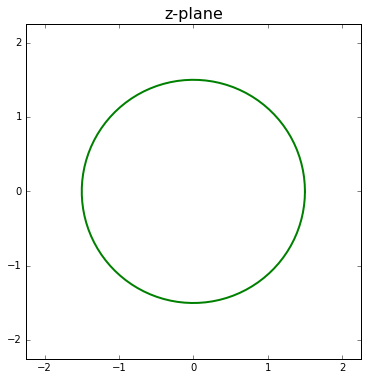

In [46]:
# plotting the circle before the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.title('z-plane', fontsize=16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(z.real,z.imag, color='g',linewidth =2, linestyle='-');

In [58]:
# applying the Joukowski Transformation to the circle 
zeta_circle = joukowski_trans(z,c)

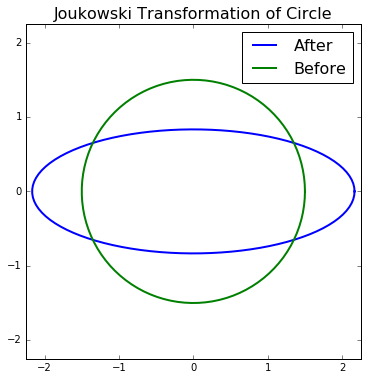

In [60]:
## Plotting the new transformed shape from the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.title("Joukowski Transformation of Circle", fontsize =16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(zeta_circle.real, zeta_circle.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

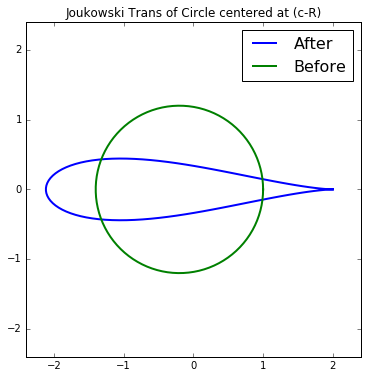

In [63]:
# Defining a new Circle for the next exercise, centered a (c-R,0) 
c = 1
R = 1.2
z = R*numpy.cos(theta)+(c-R)+R*numpy.sin(theta)*1j

# calculating the transformation
zeta = joukowski_trans(z,c)

#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.title('Joukowski Trans of Circle centered at (c-R)')
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(zeta.real, zeta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

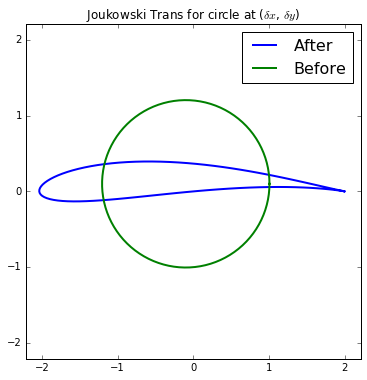

In [64]:
# Another exercise in Joukowski Transformations of circle at (-deltax, deltay)
delta_x = -0.1 
delta_y = 0.1

#Calculating the radius according to the problem specifics
R = math.sqrt((c-delta_x)**2+(delta_y)**2)

#Calculating the z coordinates 
z = R*numpy.cos(theta)+delta_x + (R*numpy.sin(theta)+delta_y)*1j

# Joukowski Transformation
zeta = joukowski_trans(z,c)

#plotting 
#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.title('Joukowski Trans for circle at ($\delta x$, $\delta y$)')
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(zeta.real, zeta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

The last problem in this section asks, Consider the case where we obtained a symmetric airfoil. In polar coordinates, which point on the circle corresponds to the trailing edge of the airfoil? 
 
- $\theta$ = $0^o$

## 3. Grid points on the z-plane using polar coordinates

A point on the z-plane correspond to a point on the $\zeta$-plane 

When you have a solution to Laplace's equation on the complex plane and a apply a mapping, like the Joukowski Transformation, the transformed function is still a solution to Laplace's equation 

$\psi(\zeta x, \zeta y) = \psi(\zeta x(x,y), \zeta y(x,y))$

We want to build a set of grid points around a cylinder and airfoil 

**EXERCISES** 
1. build a set of grid points 


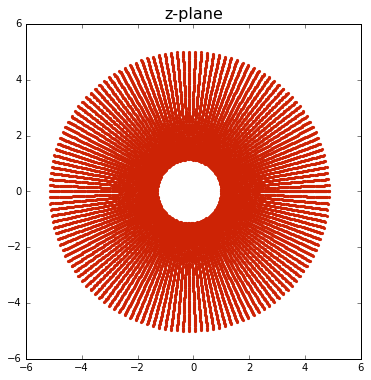

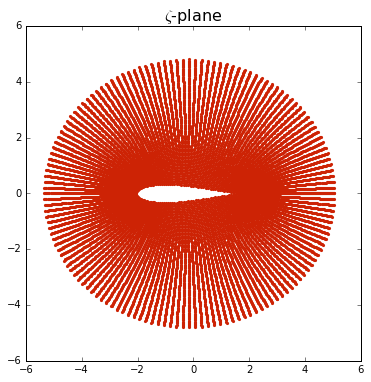

In [67]:
# Setting the parameters of the circle, center location, radius and joukowski trans constant
xc = -0.15
yc = 0 
R = 1.15
c = 1 

# Discritizing the coordinates and the number of points in radial and theta direction 
Nr = 100
r = numpy.linspace(R, 5, Nr)
Ntheta = 145 
theta = numpy.linspace(0,2*math.pi,Ntheta) 

# Defining the meshgrid
r_tot, theta_tot = numpy.meshgrid(r,theta)

# Transforming the radial coordinate to z coordinates, z = x + yj
z = r_tot*numpy.cos(theta_tot)+xc + 1j*(r_tot*numpy.sin(theta_tot)+yc)

# Joukowski Transformation of the z coordinates 
zeta = joukowski_trans(z,c)

# Plotting to Visualize the scatter plots in the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16);
pyplot.scatter(z.real,z.imag,s=10,color='#CD2305',marker='o',linewidth=0);


# Plotting to visualize the scatter plots in the zeta plane 
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('$\zeta$-plane', fontsize=16);
pyplot.scatter(zeta.real,zeta.imag,s=10,color='#CD2305',marker='o',linewidth=0);


## 4. Flow over  a symmetric Joukowski airfoil with zero angle of attack

We are going to evaluate the flow over these shapes using a free stream velocity 

***Stream function and streamlines***

$\psi(\zeta) = \psi (\zeta (z))$

In [68]:
# define the freestream velocity 
u_inf = 1.0 
psi_freestream = u_inf*z.imag

# to have a R = 1.15, we need to calculate what the strength of the doublet should be 
strength = 2*math.pi*u_inf*R**2

# define a function to get the velocity of the doublet 
def get_velocity_doublet(strength,xd,yd,X,Y):
    """
    returns the velocity field generated by a doublet 
    
    Parameters
    ----------
    strength(float): strength of the doublet
    xd(float): x-coordinate of the doublet
    yd(float): y-coordinate of the doublet 
    X(2D Numpy array of floats): x-coordinate mesh points 
    Y(2D Numpy array of floats): y-coordinate mesh points 
    
    Returns
    --------
    u(2D Numpy array of floats): x-component of the velocity vector field
    v(2D Numpy array of floats): y-component of the velocity vector field 
    
    """
    
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u,v 

# defining a function to calculate the stream line of a doublet 
def get_stream_function_doublet(strength,xd,yd,X,Y):
    """
    Returns the stream-function generated by a doublet. 
    
    Parameters
    ----------
    strength(float): strength of the doublet 
    xd(float): x-coordinate of a doublet 
    yd(float): y-coordinate of a doublet 
    X(2D Numpy array of floats): x-coordinate of the mesh points
    Y(2D Numpy array of floats): y coordinate of the mesh points 
    
    Returns 
    -------
    psi(2D Numpy array or floats): The stream function
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

strength

8.309512568745001

The stream function has mapped points to the eta plane. The stream function that was calculated in the for a certain point at the z-plane can simply be plotted except with the coordinates of the eta plane. 


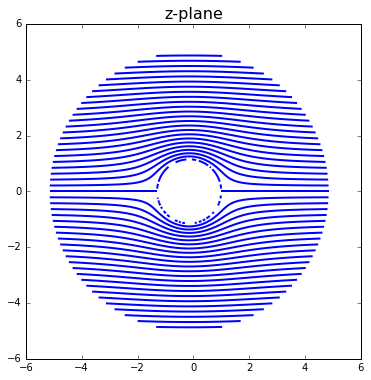

In [20]:
# Calculating the streamfunction 
psi_z = get_stream_function_doublet(strength, xc,yc,z.real,z.imag)
Psi = psi_freestream +psi_z

# plotting the stream functions for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(z.real, z.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

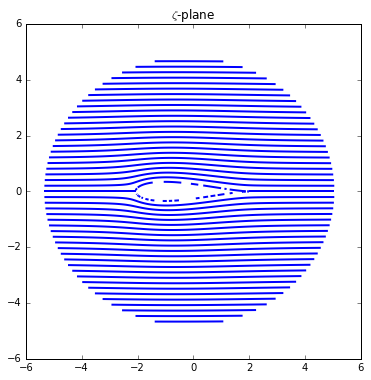

In [69]:
# plotting the streamlines around the airfoil on the zeta-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('$\zeta$-plane', fontsize=16)
pyplot.contour(zeta.real, zeta.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

***Velocity vectors and pressure coefficients ***

Unlines the the stream function, we **CANNOT** say that the velocity at the corresponding points on the eta-plane are the same as those on z-plane

The stream function remains the same on the original and the mapped point because the stream function is a scaler solution of Laplace's equation

Velocity is not a solution of the laplace's equation the coorsinates change with a transformation 

In [22]:
# calculating the doublet velocity field for z plane 
u_z, v_z = get_velocity_doublet(strength,xc,yc,z.real,z.imag)

#calculating the velocity componenets on the z-plane 
U = u_inf + u_z
V = v_z

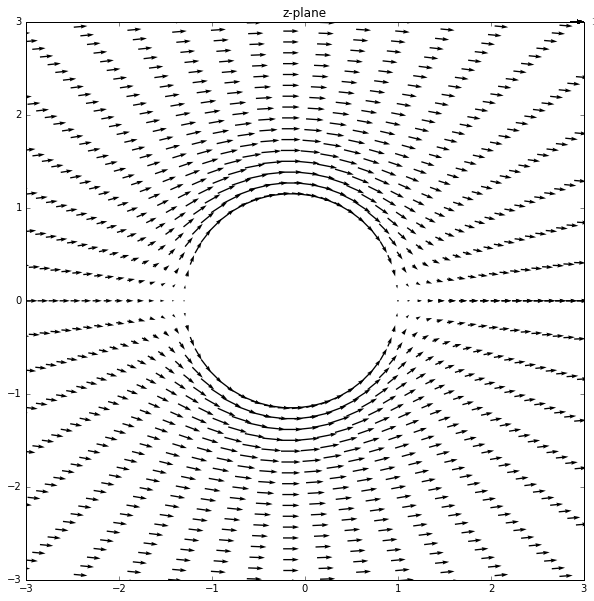

In [70]:
# defining the X and Y coordinates on the z-plane for plotting 
X = z.real
Y = z.imag

# Plotting the velocity vectors on the z-plane 
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane', fontsize =16)
Q = pyplot.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

To calculate the velocity on the zeta plane, we need to apply the chain rule. This is the form we will use 

W$\zeta$ = u$\zeta$ - iv$\zeta$ = (uz - i vz)/$d\zeta / dz$

$d\zeta / dz $ = 1 - $(c/z)^2$

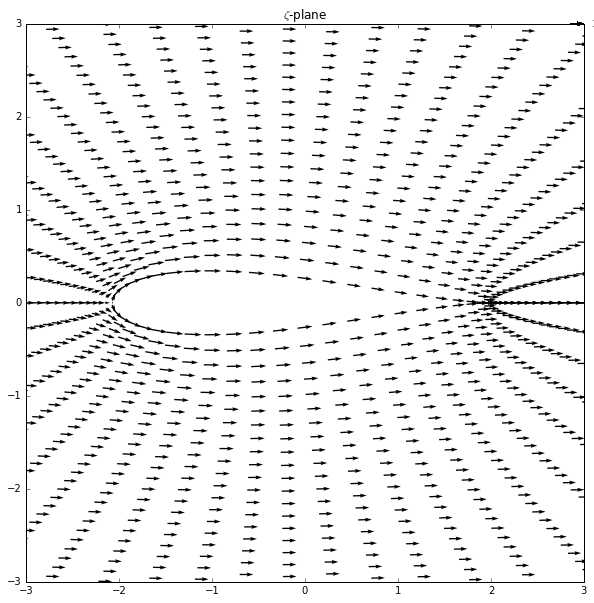

In [71]:
# Mapping Velocity Coordinates to zeta-plane 
W = (U- 1j*V)/(1-(c/z)**2)

# Decomposing W to U and V components 
U_zeta = W.real
V_zeta = -W.imag # The negative comes from the fact that (u-iv)

# Defining the x and Y components of the meshgrid 
X_zeta = zeta.real
Y_zeta= zeta.imag


# Plotting the velocity vectors in the zeta plane 
size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('$\zeta$-plane', fontsize =16)
Q = pyplot.quiver(X_zeta[::3, ::3], Y_zeta[::3, ::3], U_zeta[::3, ::3], V_zeta[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')


**Calculating the 62nd point velocity on the airfoil**

In [25]:
# The angle which the 62nd point on the airfoil is located 
t=theta[61]
t

2.6616271092913526

In [26]:
# The x-coordinate in the z plane of the 62nd point 
x_62 = R*numpy.cos(t)+xc
x_62

-1.1700624581549548

In [27]:
# The y-coordinate in the z plane of the 62nd point
y_62 = R*numpy.sin(t)+yc
y_62

0.53101090522028893

In [28]:
# The z point of the 62nd point
z_62 = x_62 + 1j*y_62
numpy.where(z==z_62)

(array([61]), array([0]))

In [29]:
# The pounts on the zeta plane 
zeta_62 = joukowski_trans(z_62,c)
numpy.where(zeta==eta_62)

(array([61]), array([0]))

In [30]:
# Horizontal component of the velocity 
U_eta[61,0]

1.1063384662852436

In [31]:
# Verticle component of the velocity 
V_eta[61,0]

0.52363334929849692

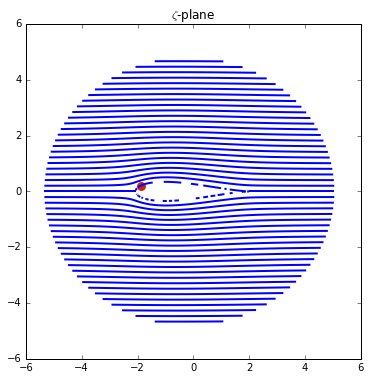

In [73]:
# plotting the streamlines around the airfoil on the eta-plane with the 62 point highlighted
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('$\zeta$-plane', fontsize =16 )
pyplot.contour(zeta.real, zeta.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->')
pyplot.scatter(eta_62.real, eta_62.imag, s=80,color='#CD2305',marker='o',linewidth=0);

** Pressure Coefficient**

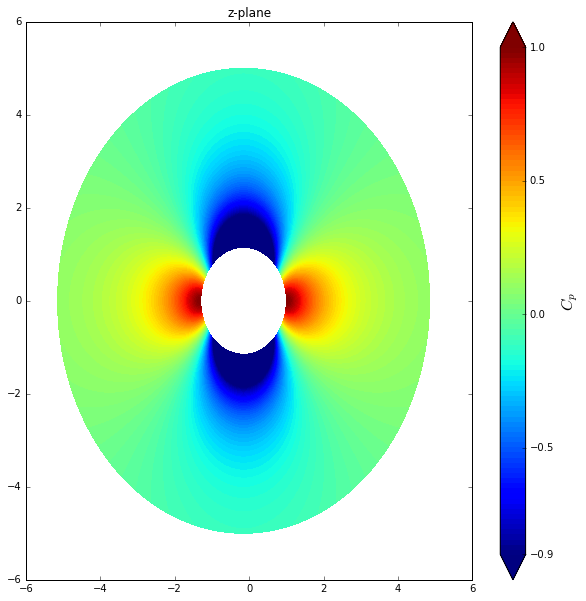

In [74]:
# Calculating the pressure coefficient in the z plane 
Cp = 1.0 - ((U**2+V**2)/u_inf**2)

# plot the pressure coefficient field 
size=10 
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('z-plane', fontsize = 16)
contf = pyplot.contourf(X,Y,Cp,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);


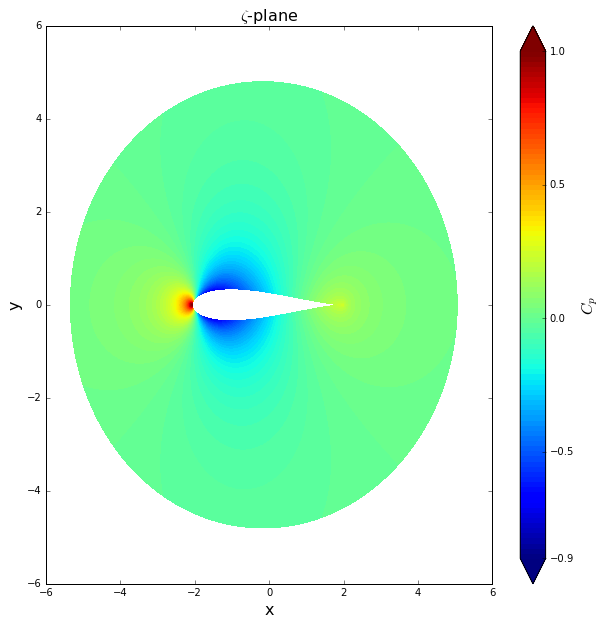

In [76]:
# Calculating the Pressure coeffcient for zeta-plane 
Cp_eta = 1.0 - ((U_eta**2+V_eta**2)/u_inf**2)

# plot the pressure coefficient field 
size=10 
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y',fontsize =16) 
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('$\zeta$-plane', fontsize=16)
contf = pyplot.contourf(X_eta,Y_eta,Cp_eta,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);

In [36]:
#minimum pressure coefficient on the surface of the airfoil
numpy.min(Cp)

-0.68775567409240423

Completed the exercises at the bottom of Part 4

1. What is the strength of the doublet? 8.31 
2. what is the velocity at the 62nd point on the airfoil surface?
    - u = 1.11
    - v = 0.52 
3. What is the minimum value of the pressure coefficient on the airfoil surface?
    - -0.69 


## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attacke without circulation

We need to rotate the coordinate system because we cannot just superimpose a non-zero inlet angle and a doublet to obtain what we want 

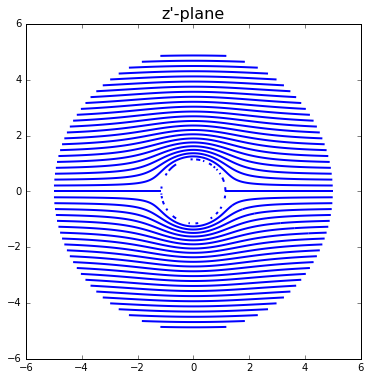

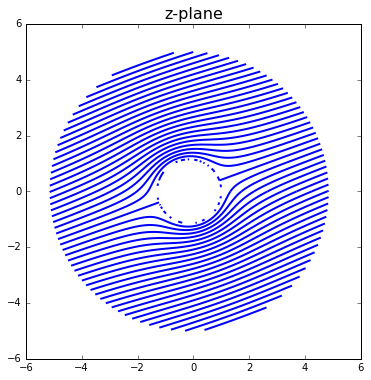

In [37]:
AoA = 20.0*(math.pi/180)  
z_prime = (z-(xc+1j*yc))*cmath.exp(-1j*AoA)


x_doublet, y_doublet = 0.0, 0.0 

# psi_AoA = get_stream_function_doublet(strength, x_doublet, y_doublet, x_prime, y_prime)
psi_AoA = get_stream_function_doublet(strength, x_doublet, y_doublet, z_prime.real, z_prime.imag)
psi_freestream= u_inf*z_prime.imag
psi_prime =psi_freestream + psi_AoA

# plotting the stream functions for the flow around the cylinder on the z'-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title("z'-plane", fontsize=16)
pyplot.contour(z_prime.real, z_prime.imag, psi_prime, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

# plotting the new stream function for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title("z-plane", fontsize=16)
pyplot.contour(z.real, z.imag, psi_[rime, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');



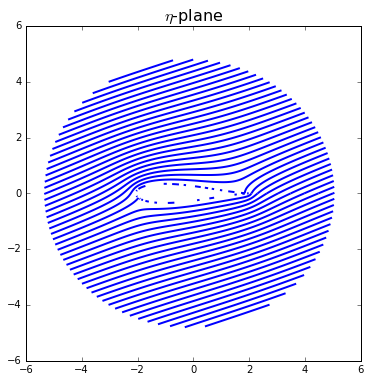

In [38]:
#z_prime = x_prime + 1j*y_prime
eta = joukowski_trans(z, c)


# plotting the stream functions for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('$\eta$-plane', fontsize=16)
pyplot.contour(eta.real, eta.imag, psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

#eta_shape = joukowski_trans(z_circle,c)
#pyplot.plot(eta_shape.real, eta_shape.imag, color ='k', linewidth=2, linestyle='-');

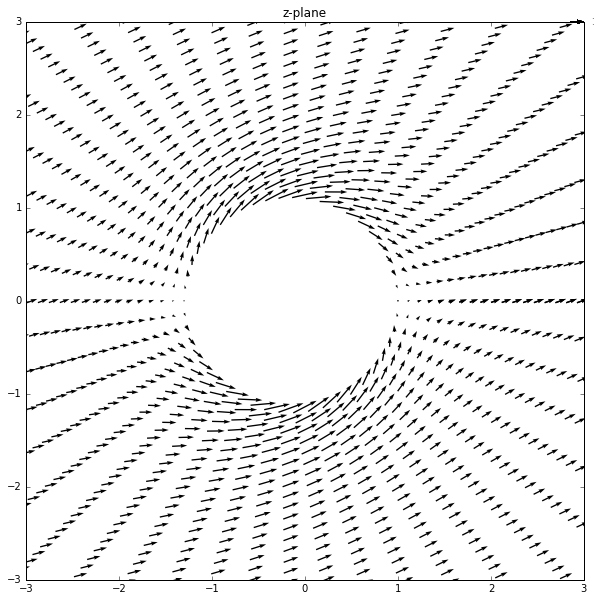

In [39]:
W_ = (U-1j*V)*cmath.exp(-1j*AoA)
U_prime = W_.real
V_prime = -W_.imag
X_prime = (X - xc)*numpy.cos(AoA)+(Y-yc)*numpy.sin(AoA)
Y_prime = -(X-xc)*numpy.sin(AoA)+(Y-yc)*numpy.cos(AoA)

#U_prime_doublet, V_prime = get_velocity_doublet(strength, x_doublet, y_doublet,X_prime, Y_prime)
#U_prime = U_prime_doublet+u_inf

size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane')
Q = pyplot.quiver(X[::3, ::3], Y[::3, ::3], U_prime[::3, ::3], V_prime[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

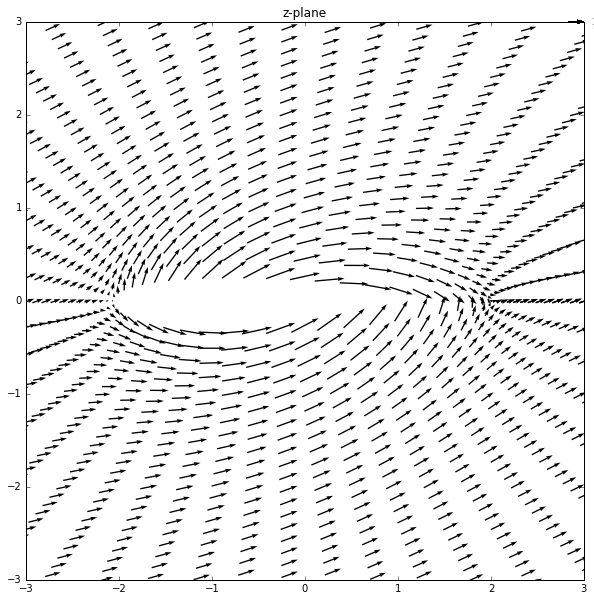

In [40]:
W = (U_eta-1j*V_eta)*cmath.exp(-1j*AoA)
U_eta_prime = W.real
V_eta_prime = -W.imag


size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane')
Q = pyplot.quiver(eta.real[::3, ::3], eta.imag[::3, ::3], U_prime[::3, ::3], V_prime[::3, ::3],
               pivot='mid', scale_units='xy', scale=6)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

NameError: name 'Cp_z' is not defined

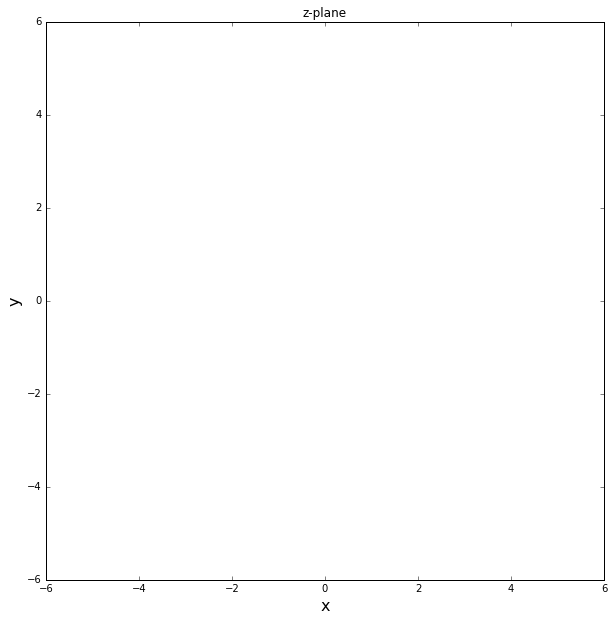

In [41]:
# Pressure coeffcient for z-plane 
X = z.real
Y = z.imag
Cp = 1.0 - ((U_prime**2+V_prime**2)/u_inf**2)

# plot the pressure coefficient field 
size=10 
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y',fontsize =16) 
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('z-plane')
contf = pyplot.contourf(X,Y,Cp_z,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);